In [10]:
# !pip install -r requirements.txt
# !pip install openpyxl

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [22]:
# Cargar datos de producción láctea
milk_data = pd.read_csv('datos_red1/monthly_milk_production.csv')
milk_data['Date'] = pd.to_datetime(milk_data['Date'])
milk_data.set_index('Date', inplace=True)
print(milk_data.head())
# Obtener datos del IPSA (ejemplo)
ipsa_data = pd.read_excel('datos_red1/ipsa_data.xlsx')
ipsa_data['Date'] = pd.to_datetime(ipsa_data['FECHA'])
ipsa_data.set_index('Date', inplace=True)
ipsa_data = ipsa_data[['CLOSE']]
print(ipsa_data.head())

            Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727
                  CLOSE
Date                   
2024-11-12  6508.640839
2024-11-13  6558.495842
2024-11-14  6478.967729
2024-11-15  6527.016808
2024-11-18  6542.391359


In [24]:
# Preprocesar datos
scaler = MinMaxScaler()
milk_scaled = scaler.fit_transform(milk_data)
ipsa_scaled = scaler.fit_transform(ipsa_data)

# Crear conjuntos de entrenamiento y prueba
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X_milk, Y_milk = create_dataset(milk_scaled, time_step)
X_ipsa, Y_ipsa = create_dataset(ipsa_scaled, time_step)

# Reshape para LSTM
X_milk = X_milk.reshape(X_milk.shape[0], X_milk.shape[1], 1)
X_ipsa = X_ipsa.reshape(X_ipsa.shape[0], X_ipsa.shape[1], 1)

# Crear modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar modelo
model.fit(X_milk, Y_milk, epochs=10, batch_size=1, verbose=1)

# Validar modelo y predecir 3 meses adelante
predictions = model.predict(X_milk[-3:])
predictions = scaler.inverse_transform(predictions)
print(predictions)

Epoch 1/10


c:\Magister\3er trimestre\MLA\MLA_T3\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0943
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0301
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0238
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0208
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0099
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0082
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0071
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
[[6668.434]
 [6648.374]
 [6638.728]]


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - loss: 0.6583 - val_loss: 0.6035
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - loss: 0.5869 - val_loss: 0.5712
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.5456 - val_loss: 0.6027
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - loss: 0.5688 - val_loss: 0.5850
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 0.5529 - val_loss: 0.5700
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - loss: 0.5437 - val_loss: 0.5706
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.5471 - val_loss: 0.5714
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 0.5485 - val_loss: 0.5692
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - loss: 0.5443 - val_loss: 0.5728
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - loss: 0.5439 - val_loss: 0.5753
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - loss: 0.5449 - val_loss: 0.5698
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.5412 - val_lo

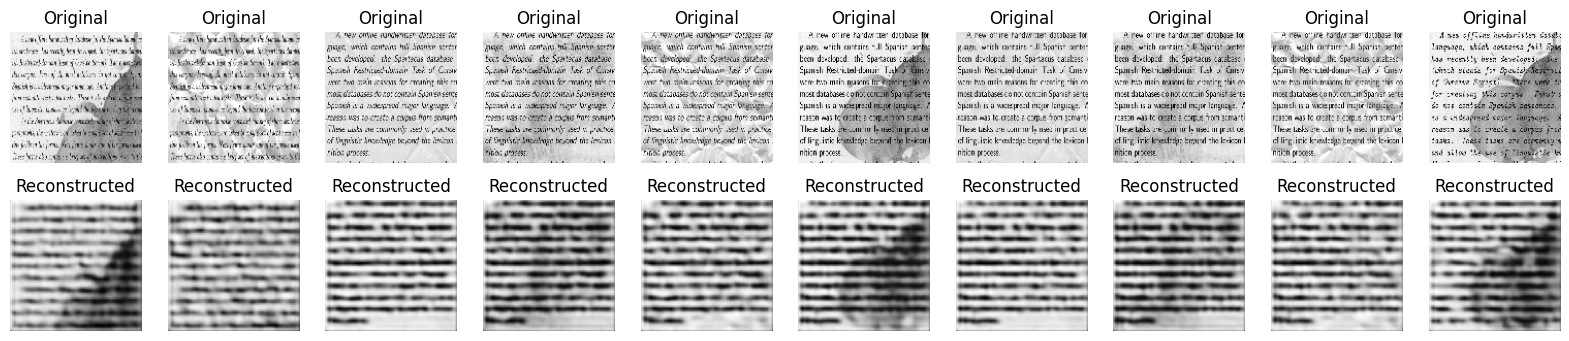

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import os

# Cargar y preprocesar imágenes
def load_images(directory, size=(128, 128)):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=size, color_mode='grayscale')
            img = img_to_array(img) / 255.0
            images.append(img)
    return np.array(images)

train_images = load_images('denoising-dirty-documents/train')
test_images = load_images('denoising-dirty-documents/test')


# Crear modelo autoencoder
input_img = Input(shape=(128, 128, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar modelo
autoencoder.fit(train_images, train_images, epochs=50, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

# Mostrar resultados
decoded_imgs = autoencoder.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(128, 128), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()